In [1]:
import urllib.request
import pandas as pd

urllib.request.urlretrieve("https://raw.githubusercontent.com/mustafaMari/SADSM-Lab/76d9974b4f43bedcaca4c44c3fca06b1532ee62c/SADSM%20Lab%20porject%20dataset.csv", "SADSM Lab Dataset")
columns = ["Country", "Firearm-related death", "Gunowners"]
reader = pd.read_csv("SADSM Lab Dataset", sep=',',skiprows=1,names=columns,index_col=0)
reader.sample(25)

,Firearm-related death,Gunowners
Country,,
Switzerland,3.010,27.6
Norway,1.750,28.8
Hong Kong,0.030,3.6
Czech Republic,2.010,12.5
Denmark,1.470,9.9
Cuba,0.500,2.1
Nicaragua,4.680,5.2
Moldova,1.030,3.0
Poland,0.260,2.5


In [2]:
firearm_related_death =  reader.sort_values(by="Firearm-related death", ascending=True)
print(firearm_related_death)

             Firearm-related death  Gunowners
Country                                      
Singapore                    0.025        0.3
Hong Kong                    0.030        3.6
Japan                        0.060        0.3
Azerbaijan                   0.070        3.6
Iceland                      0.070       31.7
...                            ...        ...
Guatemala                   34.100       12.1
Eswatini                    37.160        4.8
El Salvador                 45.600       12.0
Venezuela                   49.220       18.5
Honduras                    60.000       14.1

[72 rows x 2 columns]


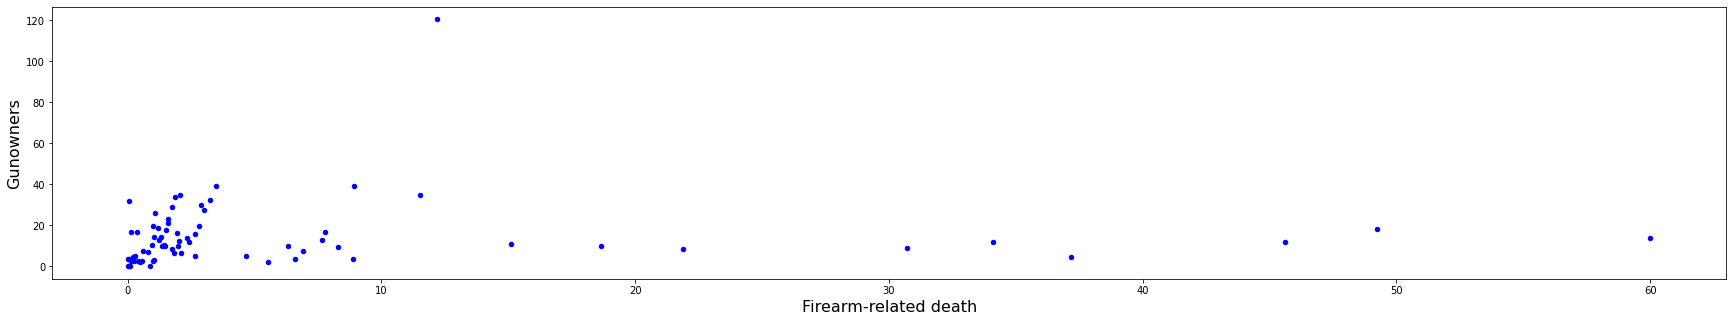

In [3]:
import matplotlib.pyplot as plt
reader[::-1].plot(kind='scatter', x="Firearm-related death", y="Gunowners", color="blue", figsize=(30,5))
plt.xlabel(reader.columns[0], fontsize=16)
plt.ylabel(reader.columns[1], fontsize=16)
plt.show()


Model params: [0.07081502], 14.024631761824113
Error 258.89808975538404


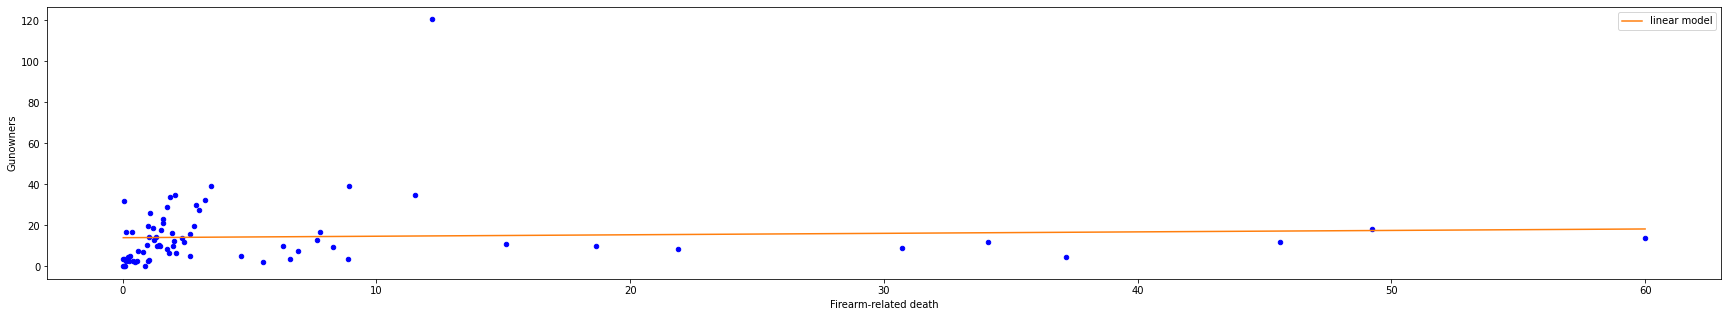

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
x = reader['Firearm-related death'].values
y = reader['Gunowners'].values

linear_model = LinearRegression()
linear_model.fit(x.reshape(-1,1),y)
x_unseen = np.linspace(start=x.min(), stop=x.max(), num=72)

y_lin_pred_unseen = linear_model.predict(x_unseen.reshape(-1,1))
reader[::-1].plot(kind='scatter', x="Firearm-related death", y="Gunowners", color="blue", figsize=(30,5))
plt.plot(x_unseen, y_lin_pred_unseen, color='tab:orange', label='linear model')
print(f"Model params: {linear_model.coef_}, {linear_model.intercept_}")
print(f"Error {mean_squared_error(y, linear_model.predict(x_unseen.reshape(-1,1)))}")
plt.legend()
plt.show()

Error 271.10180140328947


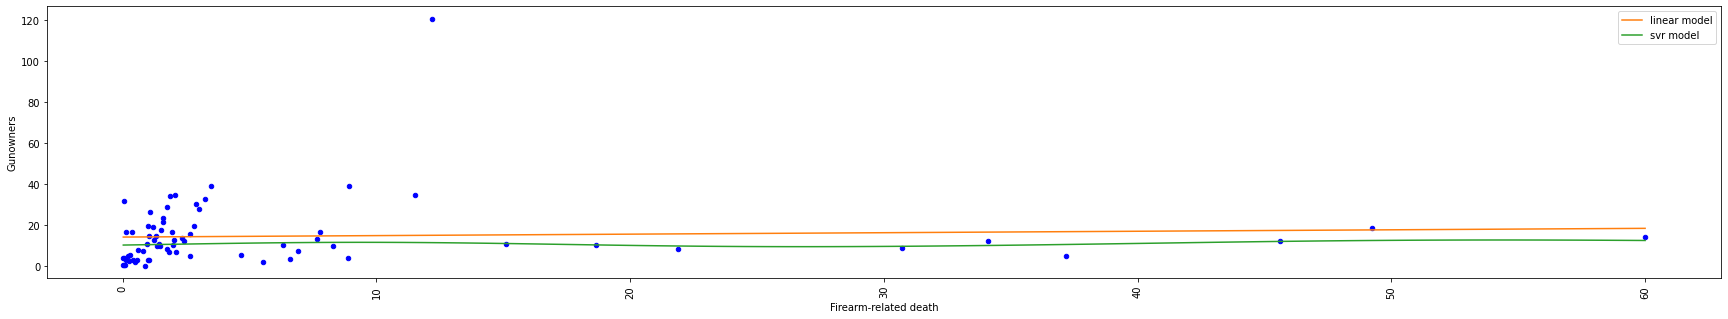

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(x.reshape(-1,1), y)

y_svr_pred_unseen = svr_model.predict(x_unseen.reshape(-1,1))

reader[::-1].plot(kind='scatter', x="Firearm-related death", y="Gunowners", color="blue", figsize=(30,5))
plt.xticks(rotation='vertical')
plt.plot(x_unseen, y_lin_pred_unseen, color='tab:orange', label='linear model')
plt.plot(x_unseen, y_svr_pred_unseen, color='tab:green', label='svr model')

print(f"Error {mean_squared_error(y, svr_model.predict(x.reshape(-1,1)))}")
plt.legend()

plt.show()

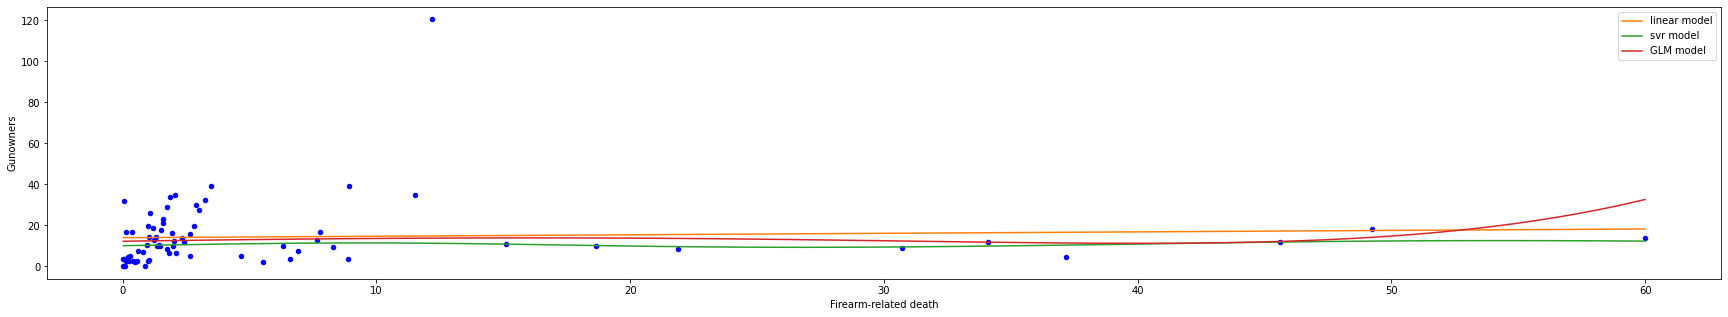

In [8]:
from sklearn.preprocessing import PolynomialFeatures

GLM_degree = 5
GLM_model = LinearRegression()
preX = PolynomialFeatures(degree=GLM_degree,
                          include_bias=True,
                          interaction_only=False)

Xpreprocessed = preX.fit_transform(x_unseen.reshape(-1,1))
GLM_model.fit(Xpreprocessed, y)
y_GLM_pred_axis = GLM_model.predict(Xpreprocessed)

reader[::-1].plot(kind='scatter', x="Firearm-related death", y="Gunowners", color="blue", figsize=(30,5))
plt.plot(x_unseen, y_lin_pred_unseen, color='tab:orange', label='linear model')
plt.plot(x_unseen, y_svr_pred_unseen, color='tab:green', label='svr model')
plt.plot(x_unseen, y_GLM_pred_axis, color='tab:red', label='GLM model')
plt.legend()
plt.show()
